In [75]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [76]:
df = pd.read_csv('data.csv')

check on nulls 

In [80]:
df.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

check on outliers 

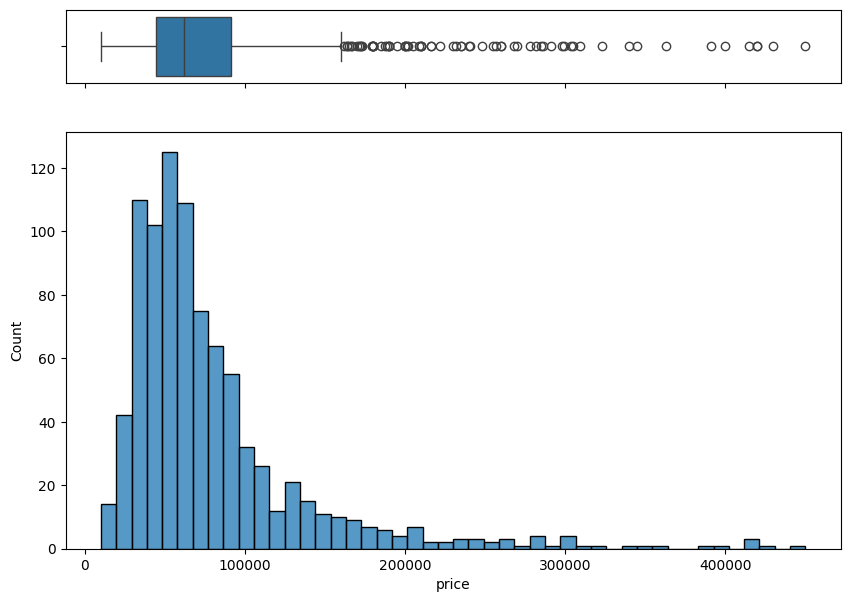

In [81]:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 7))
sns.boxplot(x=df["price"], ax=ax_box)
sns.histplot(data=df, x="price", ax=ax_hist)
ax_box.set(xlabel="")
plt.show()

the data is right skewed

modifying by log transformation

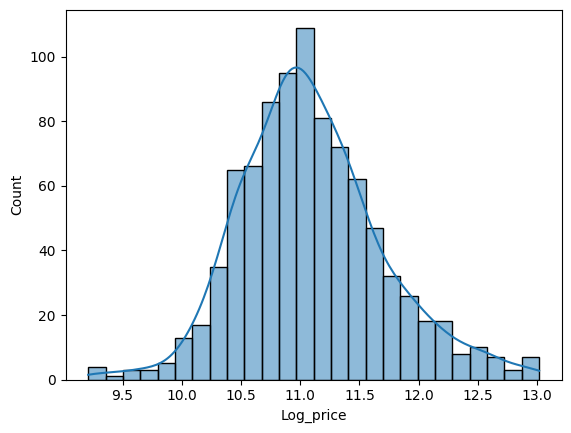

In [83]:
df['Log_price'] = np.log(df['price'])
df['Log_price'] = df['price'].apply(np.log)
sns.histplot(df, x='Log_price', kde=True)
plt.show()

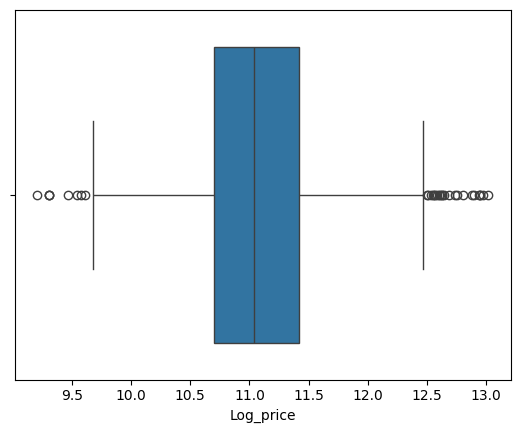

In [84]:
sns.boxplot(data=df['Log_price'], orient='h')
plt.show()

Apply Label Encoding

In [85]:


# Identify categorical columns for label encoding
categorical_columns = ["brand", "name", "processor","CPU","Ram","ROM","Ram_type", "ROM_type", "GPU", "OS"]

# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df.head()


,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,Log_price
0,0,0,9,647,49900,73.000000,105,19,6,2,5,1,19,15.6,1920,1080,12,1,10.817776
1,1,1,9,38,39900,60.000000,34,18,6,2,5,1,126,15.6,1920,1080,12,1,10.594132
2,2,2,1,440,26990,69.323529,15,17,6,2,5,1,123,14.0,1920,1080,12,1,10.203222
3,3,3,14,784,59729,66.000000,39,6,1,8,5,1,111,14.0,2240,1400,12,1,10.997573
4,4,4,2,378,69990,69.323529,160,21,6,2,2,1,91,13.3,2560,1600,7,1,11.156108


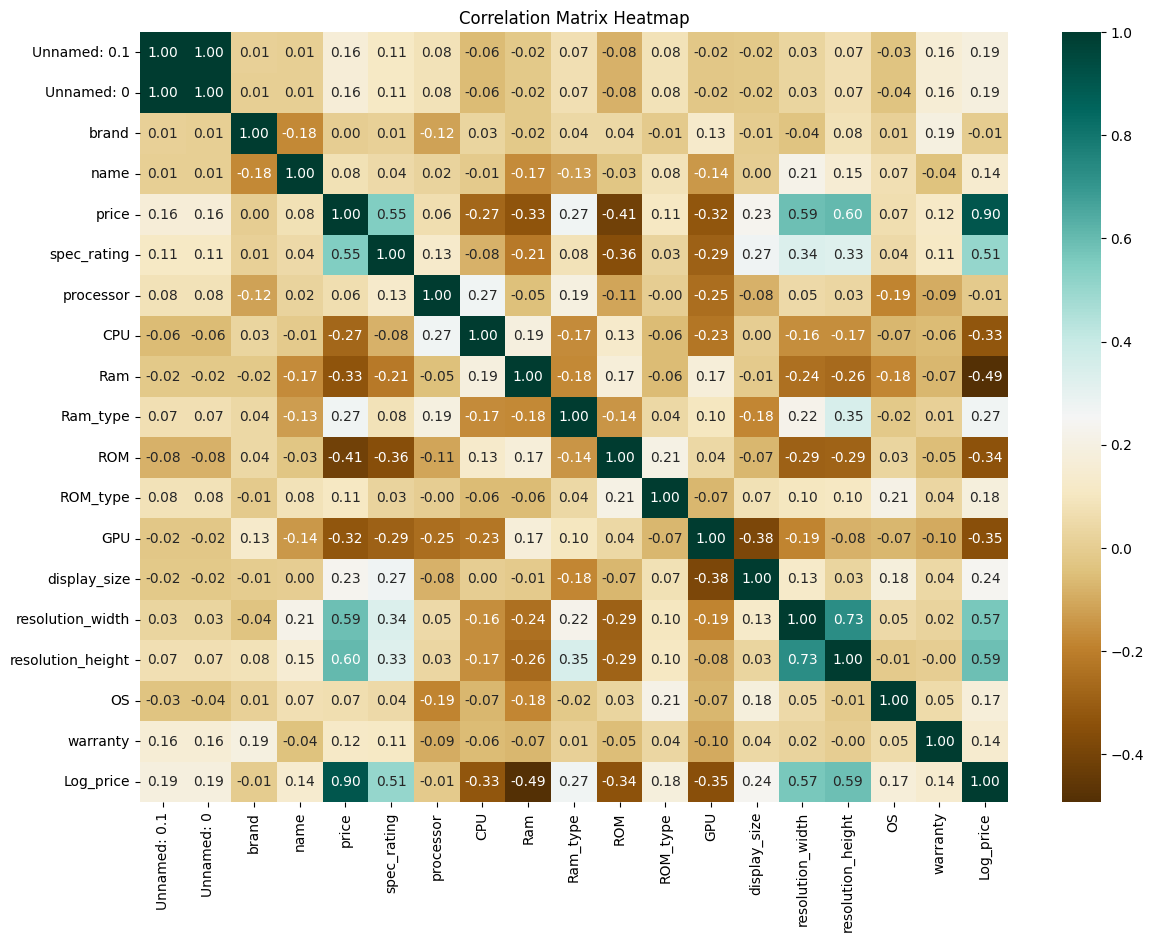

In [86]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap="BrBG", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

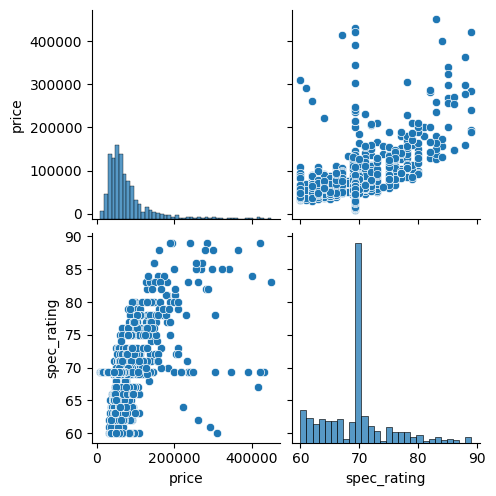

In [87]:
sns.pairplot(df[['price', 'spec_rating']])
plt.show()

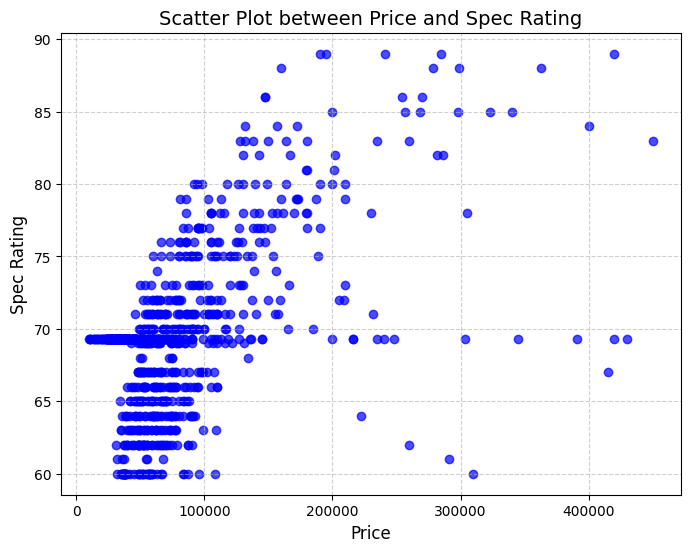

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['spec_rating'], alpha=0.7, color='blue')
plt.title('Scatter Plot between Price and Spec Rating', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Spec Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
     

Scailing the data

In [89]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print(scaled_data)

[[-1.72975712 -1.7394007  -0.00883279 ...  0.27843022 -0.24331054
  -0.45455026]
 [-1.72605422 -1.73606457 -0.00883279 ...  0.27843022 -0.24331054
  -0.82665575]
 [-1.72235132 -1.73272844 -1.35141653 ...  0.27843022 -0.24331054
  -1.4770612 ]
 ...
 [ 1.70653624  1.65344215 -1.0157706  ...  0.27843022 -0.24331054
   1.76990058]
 [ 1.71023914  1.65677828 -1.0157706  ...  0.27843022 -0.24331054
   1.13845605]
 [ 1.71394204  1.66011441 -1.0157706  ...  0.27843022 -0.24331054
   1.16386038]]
